# MalbehavD-V1 Dataset Notebook


This is the official notebook for the thesis study 

**"Evaluation and Comparison of Boosted ML Models in Behavior-Based Malware Detection"**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing

In [2]:
malbd = pd.read_csv('MalBehavD-V1-dataset.csv')
print("MalbehavD-V1 Info:")
malbd.info()

MalbehavD-V1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Columns: 177 entries, sha256 to Unnamed: 176
dtypes: int64(1), object(176)
memory usage: 3.5+ MB


In [3]:
print("MalbehavD-V1 Shape:", malbd.shape)

MalbehavD-V1 Shape: (2570, 177)


In [4]:
print("MalbehavD-V1 Preview")
malbd.head()

MalbehavD-V1 Preview


,sha256,labels,0,1,2,3,4,5,6,7,...,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176
0,5c18291c481a192ed5003084dab2d8a117fd3736359218...,0,LdrUnloadDll,CoUninitialize,NtQueryKey,NtDuplicateObject,GetShortPathNameW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4683faf3da550ffb594cf5513c4cbb34f64df85f27fd1c...,0,NtOpenMutant,GetForegroundWindow,NtQueryKey,DrawTextExW,NtSetInformationFile,RegQueryValueExA,LdrGetProcedureAddress,CoUninitialize,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9a0aea1c7290031d7c3429d0e921f107282cc6eab854ee...,0,GetForegroundWindow,DrawTextExW,GetSystemInfo,IsDebuggerPresent,GetSystemWindowsDirectoryW,NtQueryValueKey,RegCloseKey,GetFileAttributesW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e0f3e4d5f50afd9c31e51dd9941c5a52d57c7c524f5d11...,0,NtQueryValueKey,LdrUnloadDll,GlobalMemoryStatus,WriteConsoleA,NtOpenKey,LdrGetProcedureAddress,NtTerminateProcess,NtClose,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ec2b6d29992f13e74015ff0b129150b4afae15c593e4b7...,0,LdrUnloadDll,GetSystemTimeAsFileTime,NtOpenKey,WSAStartup,SetUnhandledExceptionFilter,NtTerminateProcess,NtClose,NtAllocateVirtualMemory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("MalbehavD-V1 Label Counts")
print("0 as Benign, 1 as Malicious")
malbd.labels.value_counts()

MalbehavD-V1 Label Counts
0 as Benign, 1 as Malicious


0    1285
1    1285
Name: labels, dtype: int64

MalbehavD-V1 Unique API calls list


<Axes: title={'center': 'Top 20 API calls in MalbehavD-V1'}>

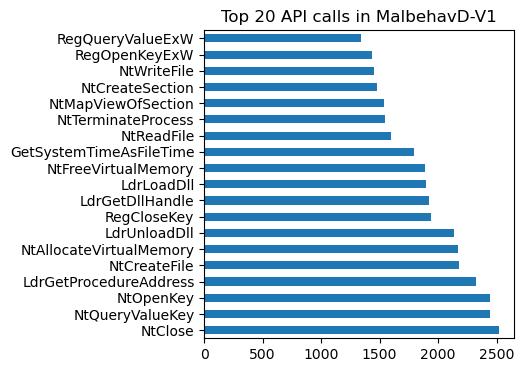

In [32]:
print("MalbehavD-V1 Unique API calls list")
malbd_unique = pd.Series(malbd[list(malbd.columns.values)[2:]].values.ravel())
malbd_unique.sort_values(inplace=True, ascending=False)
malbd_unique.value_counts()[0:19].plot(kind='barh', figsize=(4,4), title='Top 20 API calls in MalbehavD-V1') #Top 20 only